# Exercise 1.1: Introduction

Advanced Machine Learning for KCS

by Stefan Heinrich, Stella Grasshof, Laura Weihl
with material by Kevin Murphy

All info and static material: https://learnit.itu.dk/course/view.php?id=3021295

-------------------------------------------------------------------------------

## Revision of dataset visualisation with key python packages

In [1]:
from IPython.display import display
import numpy as np
import pandas as pd
import scipy as scp 
import matplotlib.pyplot as plt
import seaborn as sns


#### Load Iris dataset

https://archive.ics.uci.edu/ml/datasets/iris

In [2]:
iris_file = "../../data/iris.csv"
iris_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris_names_input = names=['sepal length (cm)', 'sepal width (cm)', 
                          'petal length (cm)', 'petal width (cm)', 'target']


#### Load iris dataset as numpy ndarray

Task: briefly experiment with different scopes on the data 

https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html


In [3]:
iris_data_np = np.genfromtxt(iris_file, delimiter=',', 
                        dtype=[np.float, np.float, np.float, np.float, 'U15'],
                        names=iris_names_input)
# problem: since data types are mixed, 
# the numpy array is not a 2D matrix, but a list of tuples
print(iris_data_np.dtype)
print(iris_data_np[:8])

# we need to select all variables of the same type do cast an numpy array that returns a matrix
iris_data_np_inputs = np.array([d[:-1] for d in iris_data_np.tolist()])
iris_data_np_targets = [d[-1] for d in iris_data_np.tolist()]
print(iris_data_np_inputs.dtype, "\n")
print(iris_data_np_inputs[:8], "\n")
print(iris_data_np_targets[:8], "\n")

# conversion from labels to ids is a bit complicated
iris_classes = sorted(set(iris_data_np_targets))
iris_classes_dict = {iris_classes[i]:i for i in range(len(iris_classes))}
iris_data_np_targets_ids = np.array([iris_classes_dict[t] for t in iris_data_np_targets])
print(iris_data_np_targets_ids[:8])   


[('sepal_length_cm', '<f8'), ('sepal_width_cm', '<f8'), ('petal_length_cm', '<f8'), ('petal_width_cm', '<f8'), ('target', '<U15')]
[(5.1, 3.5, 1.4, 0.2, 'Iris-setosa') (4.9, 3. , 1.4, 0.2, 'Iris-setosa')
 (4.7, 3.2, 1.3, 0.2, 'Iris-setosa') (4.6, 3.1, 1.5, 0.2, 'Iris-setosa')
 (5. , 3.6, 1.4, 0.2, 'Iris-setosa') (5.4, 3.9, 1.7, 0.4, 'Iris-setosa')
 (4.6, 3.4, 1.4, 0.3, 'Iris-setosa') (5. , 3.4, 1.5, 0.2, 'Iris-setosa')]
float64 

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]] 

['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa'] 

[0 0 0 0 0 0 0 0]


#### Load iris dataset as pandas dataframe

Task: learn + test different properties of dataframes - accessing & indexing, 
conversion, computations & basic statistics

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

In [4]:
# the pandas dataframe already takes care for mixed data types
iris_data_pd = pd.read_csv(iris_file, names=iris_names_input)

print(iris_data_pd.dtypes, "\n")
print(iris_data_pd[:8], "\n")
print(iris_data_pd['sepal length (cm)'][:8])

# pandas dataframe can be displayed nicely with jupyter
display(iris_data_pd)


sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                object
dtype: object 

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   

        target  
0  Iris-setosa  
1  Iris-setosa  
2  Iris-setosa  
3  Iris-setosa  
4  Iris-setosa  
5  Iris-setosa  
6  Iris-

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


#### Analyse data with scipy

Optional Task: explore subpackages in scipy to explore

https://docs.scipy.org/doc/scipy/reference/

In [5]:
print(scp.stats.describe(iris_data_np_inputs))
print(scp.stats.skew(iris_data_np_inputs[:,0]))
print(scp.stats.skew(iris_data_np_inputs[:,1]))


DescribeResult(nobs=150, minmax=(array([4.3, 2. , 1. , 0.1]), array([7.9, 4.4, 6.9, 2.5])), mean=array([5.84333333, 3.054     , 3.75866667, 1.19866667]), variance=array([0.68569351, 0.18800403, 3.11317942, 0.58241432]), skewness=array([ 0.31175306,  0.33070281, -0.27171195, -0.10394367]), kurtosis=array([-0.57356795,  0.2414433 , -1.3953593 , -1.33524564]))
0.3117530585022963
0.330702812773315


#### Plot with matplotlib

Optional Task: briefly inspect different options for visualisations with matplotlib,
create a fig that compares all combinations of variables in scatter poly 
using six subplots

https://matplotlib.org/3.3.3/gallery/index.html

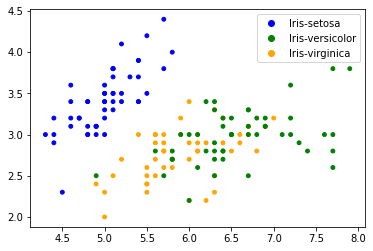

In [6]:
fig_m, ax_m = plt.subplots()
m_colors = ['blue','orange','green']
m_x = iris_data_np_inputs[:,0]
m_y = iris_data_np_inputs[:,1]
m_t = [m_colors[t] for t in iris_data_np_targets_ids]
ax_m.scatter(m_x, m_y, c=m_t, s=15.0)
# legends are a sometimes complicated ("hacky") as well:
fake_line = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') 
             for color in set(m_t)]
ax_m.legend(fake_line, iris_classes)


#### Plot with seaborn

Optional Task: inspect plotting options in seaborn, and get familiar with controlling
the output graphs by modifying: appearances (colormaps, symbols) and 
information (legends, axis labels)
https://seaborn.pydata.org/examples/index.html

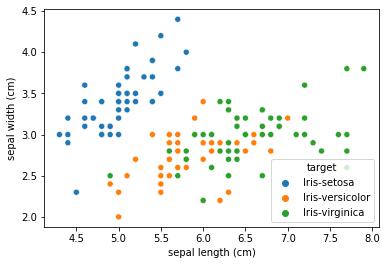

In [7]:
p_x = iris_data_pd['sepal length (cm)']
p_y = iris_data_pd['sepal width (cm)']
p_t = iris_data_pd['target']
ax_m = sns.scatterplot(x=p_x, y=p_y, hue=p_t)
